In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('Housing.csv')
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [3]:
data=data.loc[:,['area','bedrooms','bathrooms','stories','parking','price']]
data['price']/=10**6
data.rename(columns={'price':'price in 1.000.000'},inplace=True)
data.head()

,area,bedrooms,bathrooms,stories,parking,price in 1.000.000
0,7420,4,2,3,2,13.300
1,8960,4,4,4,3,12.250
2,9960,3,2,2,2,12.250
3,7500,4,2,2,3,12.215
4,7420,4,1,2,2,11.410


In [4]:
data.shape

(545, 6)

In [5]:
x=data.drop(columns='price in 1.000.000')
features=x.columns
y=data['price in 1.000.000']

In [6]:
x[:5],y[:5]

(   area  bedrooms  bathrooms  stories  parking
 0  7420         4          2        3        2
 1  8960         4          4        4        3
 2  9960         3          2        2        2
 3  7500         4          2        2        3
 4  7420         4          1        2        2,
 0    13.300
 1    12.250
 2    12.250
 3    12.215
 4    11.410
 Name: price in 1.000.000, dtype: float64)

In [7]:
x=np.array(x)
y=np.array(y)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape

((381, 5), (164, 5))

In [9]:
def z_score(xj):
    return (xj-np.mean(xj))/np.std(xj)

In [10]:
x_train_norm=np.zeros(x_train.shape)
x_test_norm=np.zeros(x_test.shape)
for j in range(5):
    x_train_norm[:,j]=z_score(x_train[:,j])
    x_test_norm[:,j]=z_score(x_test[:,j])

distribution of features before normalization


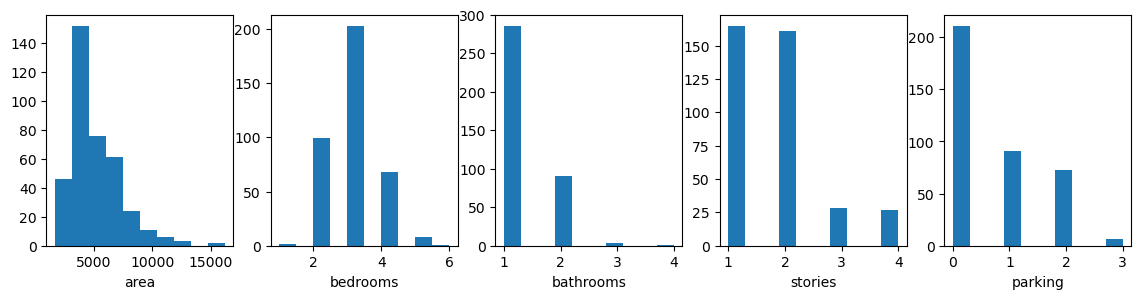

In [11]:
print('distribution of features before normalization')
plt.figure(figsize=(14,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.hist(x_train[:,i])
    plt.xlabel(features[i])

distribution of features after normalization


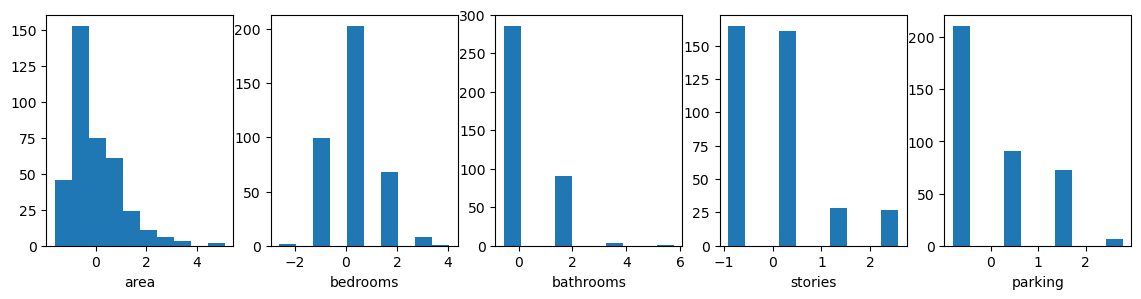

In [12]:
print('distribution of features after normalization')
plt.figure(figsize=(14,3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.hist(x_train_norm[:,i])
    plt.xlabel(features[i])

In [13]:
x_train[:5],x_train_norm[:5]

(array([[7160,    3,    1,    1,    2],
        [3584,    2,    1,    1,    0],
        [4280,    2,    1,    1,    2],
        [7000,    3,    1,    4,    2],
        [9620,    3,    1,    1,    2]], dtype=int64),
 array([[ 0.93430081,  0.0558608 , -0.55323817, -0.90765959,  1.59160337],
        [-0.71024648, -1.27432452, -0.55323817, -0.90765959, -0.80051057],
        [-0.39016681, -1.27432452, -0.55323817, -0.90765959,  1.59160337],
        [ 0.86071927,  0.0558608 , -0.55323817,  2.57373272,  1.59160337],
        [ 2.0656169 ,  0.0558608 , -0.55323817, -0.90765959,  1.59160337]]))

### Model Prediction With Multiple Variables

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
<a name="toc_15456_4"></a>
### Compute Cost With Multiple Variables
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$
<a name="toc_15456_5"></a>
### Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [14]:
class LinearRegression:
    def __init__(self):
        self.w=None
        self.b=None
    def compute_cost(self,x,y,w,b):
        m=x.shape[0]
        total_cost=0
        for i in range(m):
            f_wb_i=self.predict(x[i],w,b)
            cost_i=(f_wb_i-y[i])**2
            total_cost+=cost_i
        total_cost/=2*m
        return total_cost
    def compute_gradient(self,x,y,w,b):
        m,n=x.shape
        dj_dw,dj_db=np.zeros(n),0
        for i in range(m):
            f_wb_i=self.predict(x[i],w,b)
            dj_db_i=(f_wb_i-y[i])
            dj_db+=dj_db_i
            for j in range(n):
                dj_dw_ij=(f_wb_i-y[i])*x[i][j]
                dj_dw[j]+=dj_dw_ij
        dj_db/=m
        dj_dw/=m
        return dj_dw,dj_db
    def gradient_descent(self,x,y,alpha=1e-2,num_iters=10**4):
        n=x.shape[1]
        self.w=np.zeros(n)
        self.b=0
        J,it=[],[]
        for i in range(num_iters):
            dj_dw,dj_db=self.compute_gradient(x,y,self.w,self.b)
            self.w=self.w-alpha*dj_dw
            self.b=self.b-alpha*dj_db
            cost=self.compute_cost(x,y,self.w,self.b)
            J.append(cost)
            it.append(i)
        plt.plot(it,J)
        plt.xlabel('number of iterations')
        plt.ylabel('cost')
        plt.title('learning curve')
    def predict(self,x,w,b):
        return np.dot(x,w)+b

In [15]:
def metrics(y_true,y_pred):
    y_mean=np.mean(y_true)
    mae=np.mean(abs(y_true-y_pred))
    mse=np.mean(np.square(y_true-y_pred))
    r_square=1-np.sum(np.square(y_true-y_pred))/np.sum(np.square(y_true-y_mean))
    print(f'mae = {mae}')
    print(f'mse = {mse}')
    print(f'r_square = {r_square}')

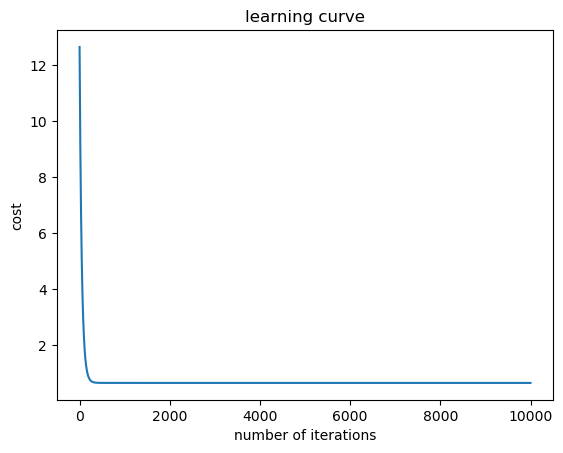

In [16]:
model=LinearRegression()
model.gradient_descent(x_train_norm,y_train)
w,b=model.w,model.b
y_pred=model.predict(x_test_norm,w,b)

In [17]:
metrics(y_test,y_pred)

mae = 1.0534156006718938
mse = 2.022063996054384
r_square = 0.5304504638536424


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse,r2_score as r_score

In [19]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

In [20]:
print(f'mae = {mae(y_test,y_pred_lr)}')
print(f'mse = {mse(y_test,y_pred_lr)}')
print(f'r_square = {r_score(y_test,y_pred_lr)}')

mae = 1.065137826372779
mse = 2.0441651155917864
r_square = 0.5253182966980272
